In [1]:
from projection_fit import ProjectionFit
from matplotlib import pyplot as plt
import h5py
import numpy as np
import pprint
from image_processing import ImageProcessor
from roi import CircularROI, RectangularROI, ROI
from gaussian_model import GaussianModel

In [2]:
def read_file(fname):
    with h5py.File(fname) as f:
        images = f["images"][:]
    return images

In [3]:
img_list= ['DYG14_1701969512.h5','DYG14_1701969514.h5','DYG14_1701969516.h5','DYG14_1701969518.h5',
           'DYG14_1701969528.h5','DYG14_1701969531.h5','DYG14_1701969533.h5','DYG14_1701969535.h5',
           'DYG14_1701969538.h5','DYG14_1701969541.h5','OTRS_LTUS_417_1692292260.h5','OTRS_IN20_621_1696886871.h5']
path = '/u/cd/cgarnier/beam_images/' + img_list[3]
print(img_list[3])
images = read_file(path)
raw_image = images[0,:,:]

DYG14_1701969518.h5


In [4]:
def get_projections(img):
    x_projection = np.array(np.sum(img,axis=0))
    y_projection = np.array(np.sum(img,axis=1))
    return x_projection, y_projection

In [5]:
x_proj, y_proj = get_projections(raw_image)

In [6]:
gauss_model = GaussianModel(x_proj)

setting distribution
heat check
-49471.000000000015 0.45 0.1 49472.000000000015
getting distribution
-49471.000000000015 0.45 0.1 49472.000000000015


In [7]:
gauss = GaussianModel()

In [8]:
projection_fit = ProjectionFit(distribution_data = x_proj, model = gauss)

setting distribution
heat check
0.896025986777949 0.45 0.1 0.10397401322205102
getting distribution
getting distribution
getting distribution


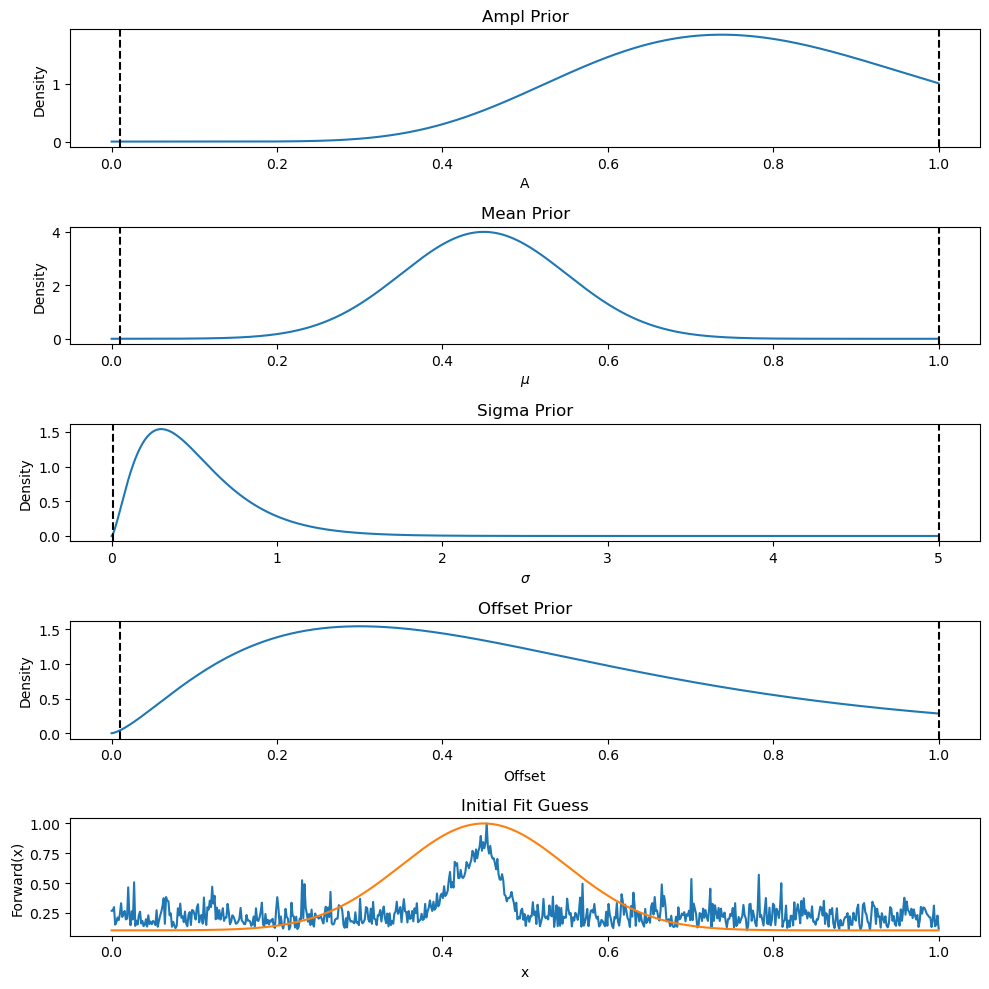

In [9]:
projection_fit.model_setup()

getting distribution
getting distribution
<class 'scipy.optimize._optimize.OptimizeResult'>


  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 4.275813223792711
        x: [ 6.123e-01  4.432e-01  2.624e-02  2.213e-01]
      nit: 21
      jac: [ 6.040e-06  2.611e-05 -2.891e-04  3.819e-06]
     nfev: 185
     njev: 37
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>

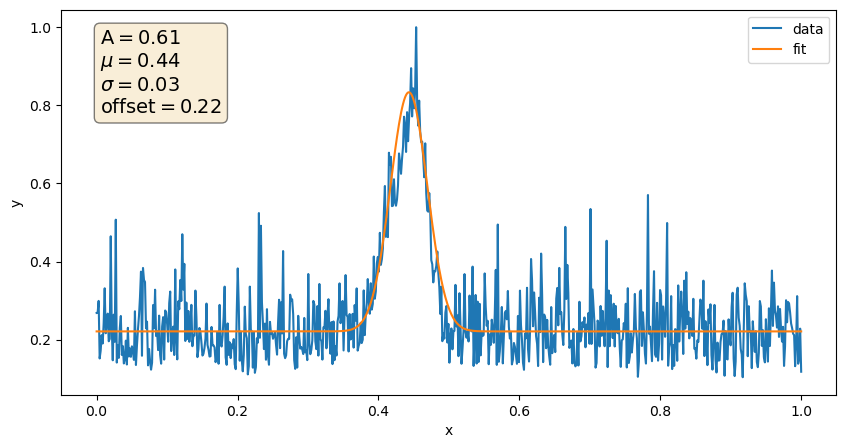

In [10]:
projection_fit.fit_model()